In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('D:/TMLC/Higgs-BosonDL/Dataset/training.csv')  # reading the data

In [4]:
df   # displaying the data 

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


## EDA - Exploratory Data Analysis 

In [5]:
df['Label'].value_counts()   # no. of rows in each class label

b    164333
s     85667
Name: Label, dtype: int64

#### Spread of labels

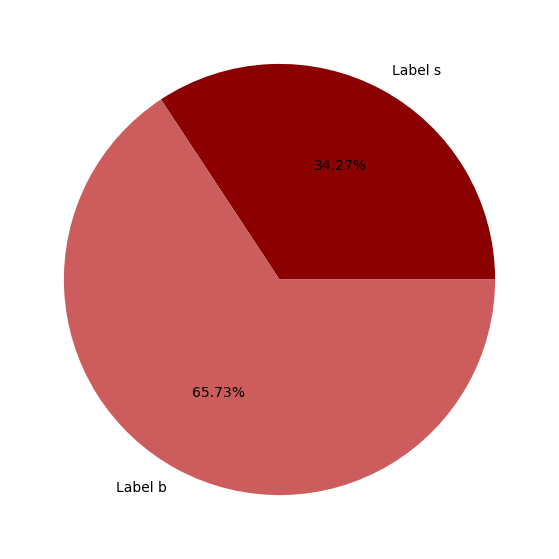

In [6]:
ls = ['Label s','Label b']
val_pop_2k = [df['Label'].value_counts()[1] ,df['Label'].value_counts()[0]]

fig = plt.figure(figsize =(10, 7))
plt.pie(val_pop_2k, labels =ls,autopct='%1.2f%%',colors = ["darkred","indianred"])
  
# show plot
plt.show()

In [7]:
nans = []
for i in range(1,len(df.columns)-1):
    nans.append((df[df.columns[i]]==-999.0).sum()) # Finding the number of -999 values in each column

In [8]:
nans_perc = np.array(nans)/len(df)    #Percentage of missing values in each column 

#### Percentage of Nan values in each column

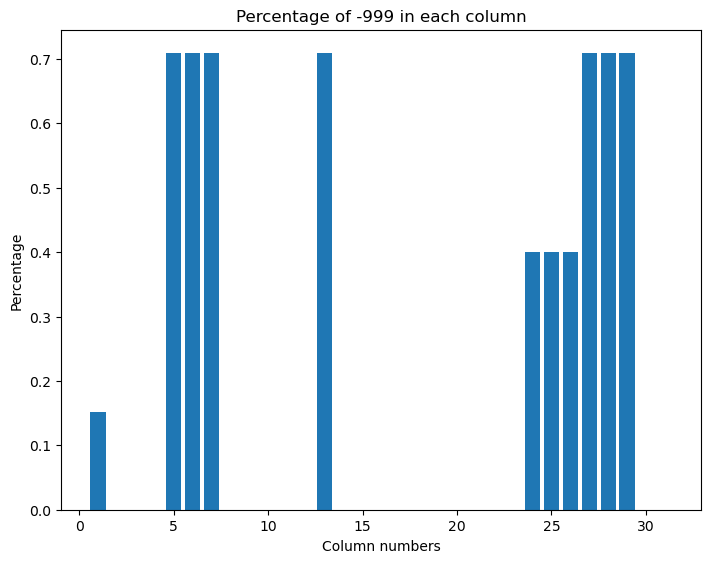

In [9]:
# Plotting the percentage of missing values 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = range(1,len(df.columns)-1)
ax.bar(x,nans_perc)
plt.title("Percentage of -999 in each column")
plt.xlabel("Column numbers")
plt.ylabel('Percentage')
plt.show()

- Seven columns have about 70 percentage of incomputable or meaningless value 
- Three columns have about 40 percentage of these values
- One column has close to 15 percent of -999

#### Correlation plot 

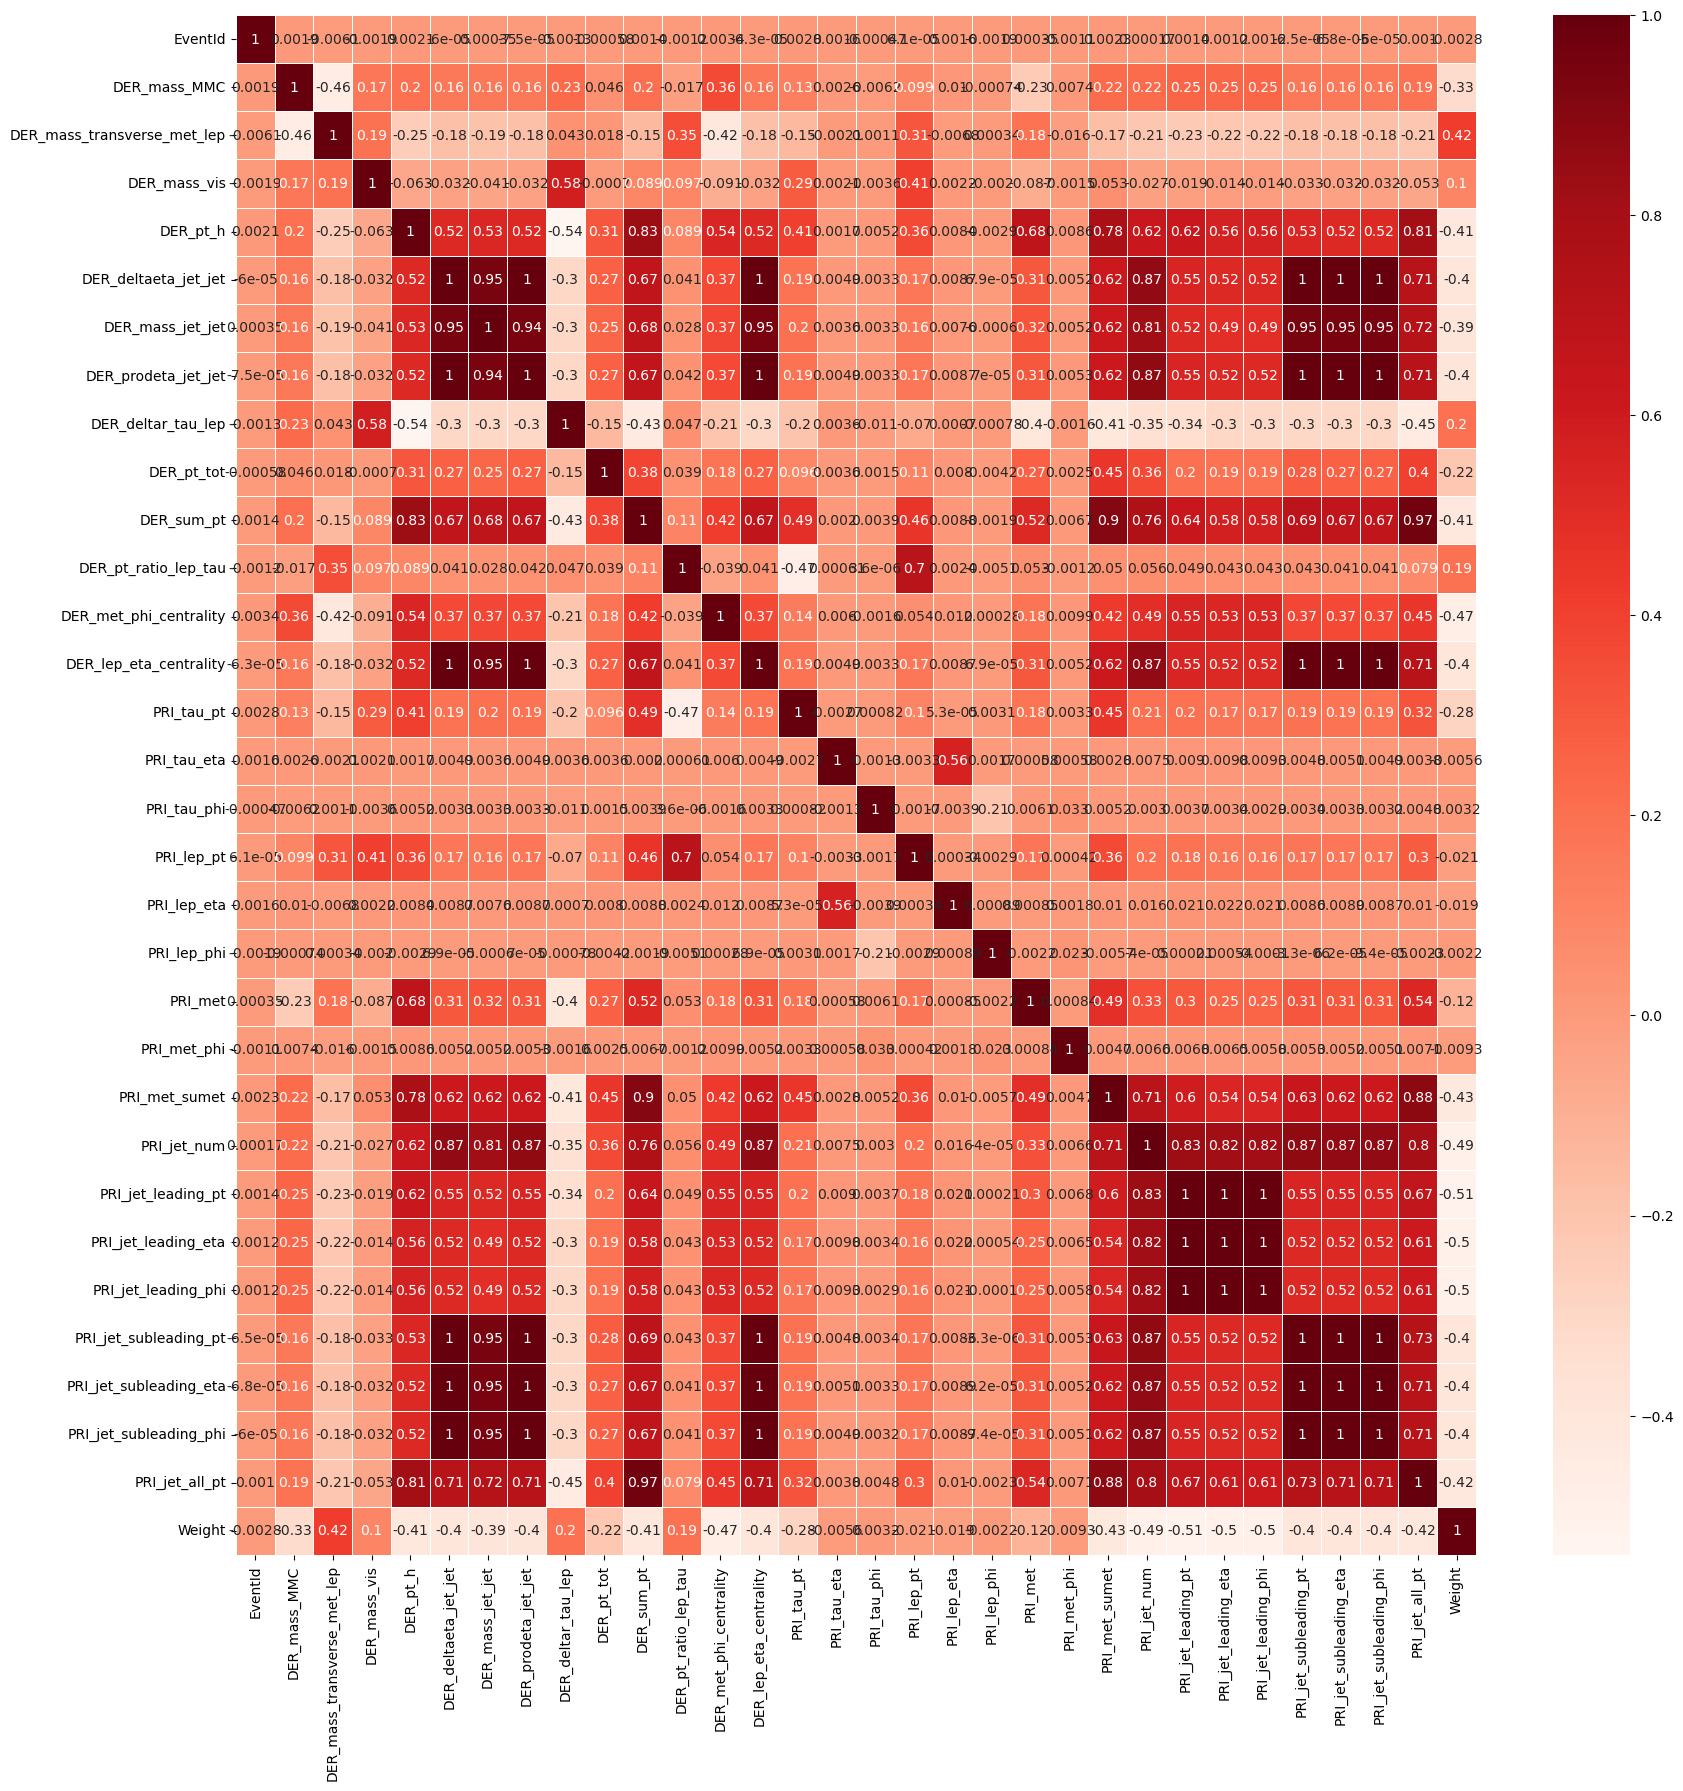

In [10]:
fig, ax = plt.subplots(figsize=(20,20),)
sns.heatmap(df.corr(), cmap = 'Reds',annot=True,linewidths=.7, ax=ax)
plt.show()

#### Finding spread of each column after removing -999

In [11]:
df_new = df

In [12]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [14]:
for i in range(1,len(df.columns)-1):
    df_new[df.columns[i]] =  df[df.columns[i]][df[df.columns[i]]!=-999.0]

In [15]:
df_new.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000
mean,224999.500000,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,...,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591,1.646767
std,72168.927986,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,...,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662,1.875103
min,100000.000000,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,...,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000,0.001502
25%,162499.750000,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,...,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,0.000000,0.018636
50%,224999.500000,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,...,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500,1.156188
75%,287499.250000,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,...,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [16]:
numeric_features = df_new[list(df.columns[1:-1])]

In [17]:
numeric_features_array = np.array(numeric_features)

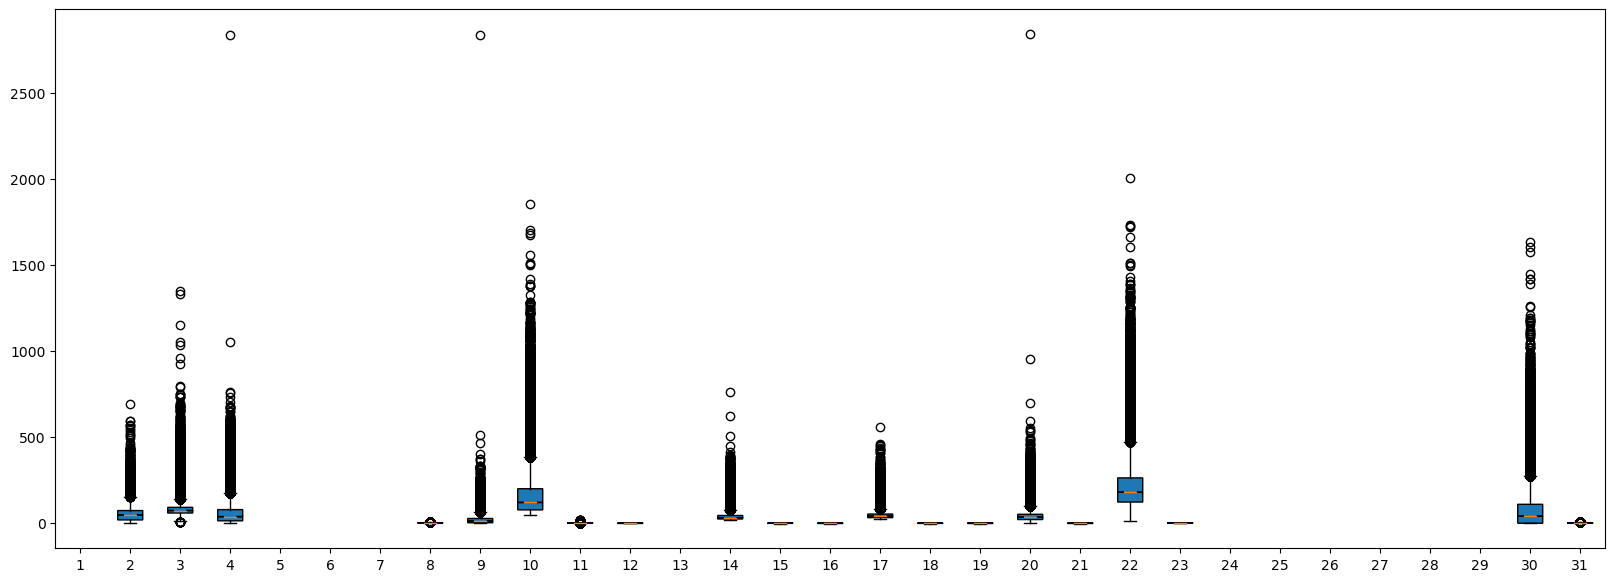

In [18]:
plt.figure(figsize=(20,7))
bp = plt.boxplot(numeric_features_array, 
                 patch_artist=True,
                 notch=True)
plt.show()

C:\Users\abhin\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


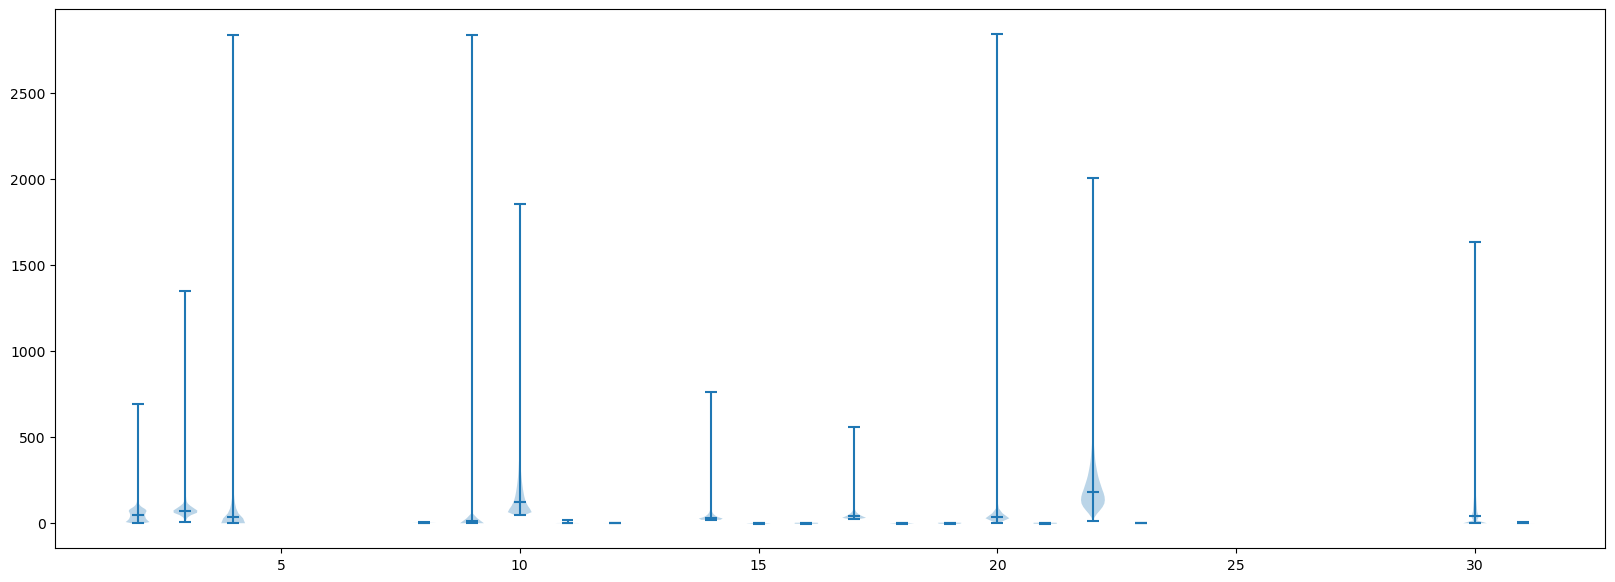

In [19]:
plt.figure(figsize=(20,7))
vp = plt.violinplot(numeric_features_array,
                    showmedians=True)
plt.show()

In [20]:
corr_arr = np.array(df_new.corr())

In [21]:
le = preprocessing.LabelEncoder()
le.fit(df['Label'])
le.classes_
Labels = le.transform(df['Label'])

#### Seperate out highly correlated features

In [22]:
n = len(df.corr())
corr_coeff = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        if(corr_arr[i][j]>0.7):
            corr_coeff[i][j] = 1
        elif(corr_arr[i][j]<0.3):
            corr_coeff[i][j] = -0.3

    

In [23]:
s1 = []
for i in range(0,n):
    for j in range(0,n):
        if(i<j):
            if(corr_arr[i][j]>0.9):
                s1.append(df.columns[i])
                

In [24]:
set(s1)

{'DER_mass_MMC', 'DER_sum_pt'}

<AxesSubplot:>

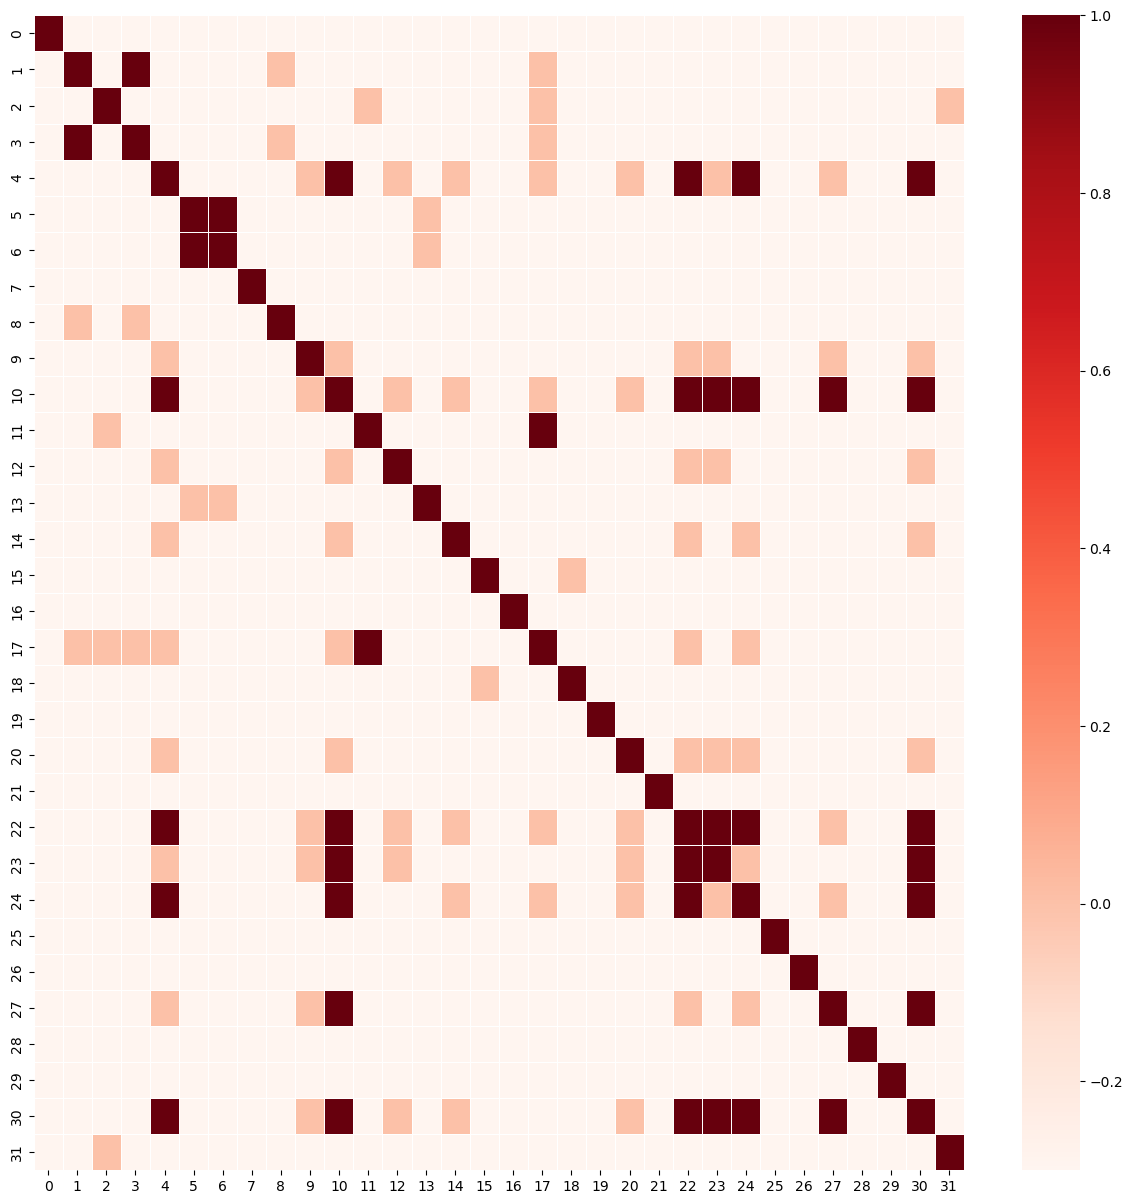

In [25]:
fig, ax = plt.subplots(figsize=(15,15),)
sns.heatmap(corr_coeff,cmap = 'Reds',linewidths=.5, ax=ax)


In [26]:
cols_na = df.columns[df.isna().any()].tolist()
cols_na

['DER_mass_MMC',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_lep_eta_centrality',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi']

## Pre-Processing

#### Imputation using mean values

In [27]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [28]:
df1 = df.drop(['Label','EventId'],inplace = False,axis = 1)
data = imp_mean.fit_transform(df1)

In [29]:
df_updated = pd.DataFrame(data,columns = df1.columns)
df_updated

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,138.470000,51.655,97.827,27.980,0.910000,124.71100,2.666000,3.064,41.928,197.760,...,258.733,2.0,67.435000,2.150000,0.444000,46.062000,1.240000,-2.475000,113.497,0.002653
1,160.937000,68.768,103.235,48.146,2.403735,371.78336,-0.821688,3.473,2.078,125.157,...,164.546,1.0,46.226000,0.725000,1.158000,57.679474,-0.011845,-0.001582,46.226,2.233584
2,121.858528,162.172,125.953,35.635,2.403735,371.78336,-0.821688,3.148,9.336,197.814,...,260.414,1.0,44.251000,2.053000,-2.028000,57.679474,-0.011845,-0.001582,44.251,2.347389
3,143.905000,81.417,80.943,0.414,2.403735,371.78336,-0.821688,3.310,0.414,75.968,...,86.062,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,-0.000,5.446378
4,175.864000,16.915,134.805,16.405,2.403735,371.78336,-0.821688,3.891,16.405,57.983,...,53.131,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000,6.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,121.858528,71.989,36.548,5.042,2.403735,371.78336,-0.821688,1.392,5.042,55.892,...,144.665,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000,4.505083
249996,121.858528,58.179,68.083,22.439,2.403735,371.78336,-0.821688,2.585,22.439,50.618,...,80.408,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,-0.000,2.497259
249997,105.457000,60.526,75.839,39.757,2.403735,371.78336,-0.821688,2.390,22.183,120.462,...,198.907,1.0,41.992000,1.800000,-0.166000,57.679474,-0.011845,-0.001582,41.992,0.018636
249998,94.951000,19.362,68.812,13.504,2.403735,371.78336,-0.821688,3.365,13.504,55.859,...,112.718,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000,1.681611


In [30]:
df_updated.drop(set(s1),inplace=True,axis=1)

In [31]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

ModuleNotFoundError: No module named 'autoviz'

In [ ]:
# filename ='D://DL_project//Dataset.csv'
# AV.AutoViz(filename, sep=',', depVar='Label', dfte=df, header=0, verbose=0,
#                             lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)

## Feature Selection 

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

#### Scaling the data

In [33]:
cols = df_updated.columns
scaler = StandardScaler()
df_updated = pd.DataFrame(scaler.fit_transform(df_updated),columns=df_updated.columns)

#Min - Max scaling
# df_norm = (df_updated - df_updated.min())/(df_updated.max()-df_updated.min())
# df_updated = df_norm

In [34]:
df_updated

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,0.068332,0.407680,-0.469966,-1.591638e+00,-1.153306,1.806346e+00,0.882478,1.033099,0.170929,1.277084,...,0.386847,1.044402,-0.369921,1.557298e+00,3.248244e-01,-0.674264,1.143819e+00,-2.527143e+00,0.412510,-0.876814
1,0.552505,0.540136,-0.153167,4.731958e-16,0.000000,-5.750076e-17,1.404888,-0.756027,-0.661279,1.292164,...,-0.357719,0.021305,-0.821154,5.267049e-01,8.329932e-01,0.000000,-1.743530e-17,-1.661628e-17,-0.273820,0.312953
2,3.195156,1.096560,-0.349710,4.731958e-16,0.000000,-5.750076e-17,0.989770,-0.430168,2.768174,1.292164,...,0.400135,0.021305,-0.863173,1.487145e+00,-1.434550e+00,0.000000,-1.743530e-17,-1.661628e-17,-0.293970,0.373645
3,0.910379,-0.005853,-0.903016,4.731958e-16,0.000000,-5.750076e-17,1.196690,-0.830735,1.084818,-0.969095,...,-0.978149,-1.001792,0.000000,1.003673e-17,1.111175e-17,0.000000,-1.743530e-17,-1.661628e-17,-0.745439,2.026352
4,-0.914556,1.313369,-0.651804,4.731958e-16,0.000000,-5.750076e-17,1.938794,-0.112795,-0.451747,-1.052877,...,-1.238475,-1.001792,0.000000,1.003673e-17,1.111175e-17,0.000000,-1.743530e-17,-1.661628e-17,-0.745439,2.452438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.643636,-1.093204,-0.830312,4.731958e-16,0.000000,-5.750076e-17,-1.253146,-0.622954,-0.212621,-1.077173,...,-0.514882,-1.001792,0.000000,1.003673e-17,1.111175e-17,0.000000,-1.743530e-17,-1.661628e-17,-0.745439,1.524354
249996,0.252913,-0.320829,-0.557013,4.731958e-16,0.000000,-5.750076e-17,0.270657,0.158111,-0.326265,-1.019364,...,-1.022845,-1.001792,0.000000,1.003673e-17,1.111175e-17,0.000000,-1.743530e-17,-1.661628e-17,-0.745439,0.453572
249997,0.319316,-0.130864,-0.284955,4.731958e-16,0.000000,-5.750076e-17,0.021586,0.146617,-0.278913,0.550699,...,-0.086089,0.021305,-0.911235,1.304169e+00,-1.093255e-01,0.000000,-1.743530e-17,-1.661628e-17,-0.317017,-0.868291
249998,-0.845324,-0.302973,-0.697378,4.731958e-16,0.000000,-5.750076e-17,1.266941,-0.243040,-0.519223,1.292164,...,-0.767429,-1.001792,0.000000,1.003673e-17,1.111175e-17,0.000000,-1.743530e-17,-1.661628e-17,-0.745439,0.018583


In [39]:
#Feature selection using chi- square
X_norm = MinMaxScaler().fit_transform(df_updated)
chi_selector = SelectKBest(chi2, k=5)
chi_selector.fit(X_norm, Labels)


#Feature selection using ANOVA F- score
# from sklearn.feature_selection import f_classif
# anov_selector = SelectKBest(f_classif, k=10)
# anov_selector.fit(np.array(df_updated), np.array(Labels))

SelectKBest(k=5, score_func=<function chi2 at 0x0000016042C8A820>)

In [40]:
selected_features = chi_selector.get_support(indices=True)
#selected_features = anov_selector.get_support(indices=True)

In [41]:
cols = df_updated.columns.values.tolist()
s = []
for i in selected_features:
    s.append(df_updated.columns[i])
df_optimized = df_updated[s]

In [42]:
s

['DER_mass_transverse_met_lep',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_jet_num',
 'Weight']

In [59]:
pd.Series(df['DER_mass_transverse_met_lep'].unique()).sort_values()

68091      0.000
52375      0.001
23594      0.002
90959      0.003
74353      0.004
          ...   
82359    570.115
69596    571.868
80329    594.287
70756    595.819
18119    690.075
Length: 101637, dtype: float64

In [60]:
pd.Series(df['DER_met_phi_centrality'].unique()).sort_values()


12    -1.414
99    -1.413
9     -1.412
48    -1.411
127   -1.410
       ...  
74     1.410
89     1.411
190    1.412
124    1.413
1      1.414
Length: 2829, dtype: float64

In [64]:
print(df['DER_met_phi_centrality'].unique())

[ 1.396  1.414 -1.285 ...  0.283  0.305  0.224]


In [61]:
pd.Series(df['DER_lep_eta_centrality'].unique()).sort_values()

11     0.000
16     0.001
80     0.002
170    0.003
160    0.004
       ...  
274    0.997
21     0.998
64     0.999
45     1.000
1        NaN
Length: 1002, dtype: float64

In [62]:
pd.Series(df['PRI_jet_num'].unique()).sort_values()

2    0
1    1
0    2
3    3
dtype: int64

In [63]:
pd.Series(df['Weight'].unique()).sort_values()

8        0.001502
15       0.001503
0        0.002653
6        0.018636
91       0.064061
           ...   
82842    7.769833
8957     7.805035
22098    7.817383
43803    7.821961
74545    7.822543
Length: 104096, dtype: float64

## Model Building

In [48]:
import tensorflow as tf
from tensorflow import  keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [49]:
def base_model():
    model = Sequential()
    model.add(Dense(32, input_dim=5, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='SparseCategoricalCrossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model



In [50]:
X = np.array(df_optimized)
y = np.array(Labels)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = base_model()
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,verbose=2,shuffle=True)

Epoch 1/20
6250/6250 - 17s - loss: 0.1340 - accuracy: 0.9455 - val_loss: 0.0217 - val_accuracy: 0.9980 - 17s/epoch - 3ms/step
Epoch 2/20
6250/6250 - 15s - loss: 0.0120 - accuracy: 0.9973 - val_loss: 5.3435e-04 - val_accuracy: 1.0000 - 15s/epoch - 2ms/step
Epoch 3/20
6250/6250 - 15s - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0011 - val_accuracy: 1.0000 - 15s/epoch - 2ms/step
Epoch 4/20
6250/6250 - 15s - loss: 0.0095 - accuracy: 0.9967 - val_loss: 3.3538e-04 - val_accuracy: 0.9999 - 15s/epoch - 2ms/step
Epoch 5/20
6250/6250 - 15s - loss: 0.0088 - accuracy: 0.9969 - val_loss: 2.3028e-04 - val_accuracy: 1.0000 - 15s/epoch - 2ms/step
Epoch 6/20
6250/6250 - 15s - loss: 0.0131 - accuracy: 0.9953 - val_loss: 0.0011 - val_accuracy: 1.0000 - 15s/epoch - 2ms/step
Epoch 7/20
6250/6250 - 15s - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0761 - val_accuracy: 0.9673 - 15s/epoch - 2ms/step
Epoch 8/20
6250/6250 - 15s - loss: 0.0115 - accuracy: 0.9966 - val_loss: 0.0029 - val_accuracy: 1.0000 - 1

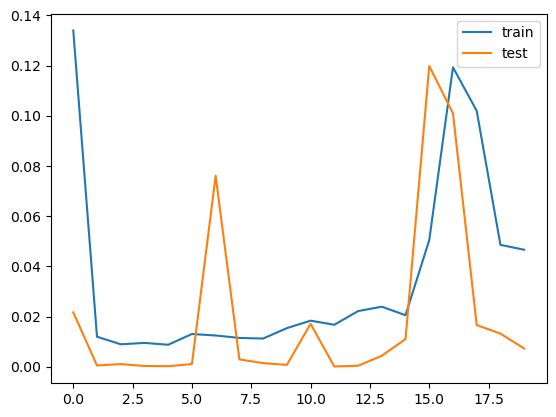

In [53]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [54]:
prediction = model.predict(x=X_test,batch_size=10,verbose = 0)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
y_pred = np.argmax(prediction,axis = -1)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33065
           1       1.00      1.00      1.00     16935

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



array([[33065,     0],
       [    0, 16935]], dtype=int64)

In [57]:

model.save('keras_model.h5')

In [58]:
#loading the model 
from keras.models import load_model
model = load_model('keras_model.h5')